In [31]:
import nltk
import string
import re
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
wn = nltk.WordNetLemmatizer()

list_of_punctuations = string.punctuation
list_of_english_stopwords = stopwords.words('english')
pd.set_option('display.max_colwidth', 100)
# There are 179 English Stopwords in NLTK

In [78]:
## regex
email_regex = re.compile(r"[\w.-]+@[\w.-]+")
url_regex = re.compile(r"(http|www)[^\s]+")
date_regex = re.compile(r"[\d]{2,4}[ -/:]*[\d]{2,4}([ -/:]*[\d]{2,4})?") # a way to match date
#keep_word_regex = re.compile(r"[^A-Za-z ]+")
#stop_regex = make_regex(stop_words)

def clean_special_patterns(text):
    """Remove special patterns - email, url, date etc."""
    ## remove
    text = url_regex.sub("", text)
    text = email_regex.sub("", text)
    text = date_regex.sub("", text)
    return text

def remove_punctuation(text):
    text_without_punctuation = "".join([char for char in text if char not in list_of_punctuations])
    return text_without_punctuation

def remove_unwanted_text(text):
    if text == "All rights reserved. This material, and other digital content on this website, may not be reproduced, published, broadcast, rewritten or redistributed in whole or in part without prior express written permission from PUNCH. Contact: [email\xa0protected]  %d":
        return ""
    else:
        return text

In [16]:
# read in raw text

business_data = pd.read_csv('Random_Sample_Data_Business_Single.txt', sep="\t",encoding='cp1252', names=['text'])
sports_data = pd.read_csv('Random_Sample_Data_Sport_Single.txt', sep="\t",encoding='cp1252', names=['text'])
politics_data = pd.read_csv('Random_Sample_Data_Politics_Single.txt', sep="\t",encoding='cp1252', names=['text'])

## Remove Punctuations from text

    
business_data['text'] = business_data['text'].apply(lambda x: remove_unwanted_text(x))
business_data['text'].replace('', np.nan, inplace=True)
business_data.dropna(subset=['text'], inplace=True)
#business_data['punct'] = business_data['text'].apply(lambda x: remove_punctuation(x))
business_data['label'] = business_data['text'].apply(lambda x: "business")

    
sports_data['text'] = sports_data['text'].apply(lambda x: remove_unwanted_text(x))
sports_data['text'].replace('', np.nan, inplace=True)
sports_data.dropna(subset=['text'], inplace=True)
#sports_data['punct'] = sports_data['text'].apply(lambda x: remove_punctuation(x))
sports_data['label'] = sports_data['text'].apply(lambda x: "sport")

    
politics_data['text'] = politics_data['text'].apply(lambda x: remove_unwanted_text(x))
politics_data['text'].replace('', np.nan, inplace=True)
politics_data.dropna(subset=['text'], inplace=True)
#politics_data['punct'] = politics_data['text'].apply(lambda x: remove_punctuation(x))
politics_data['label'] = politics_data['text'].apply(lambda x: "politics")


data = pd.concat([business_data, sports_data, politics_data])

data = data.sample(frac=1).reset_index(drop=True)
data.head()

#Number of rows labeled business 
#Number of rows for the combined data 8173

,text,label
0,"Manchester United have offered star goalkeeper David De Gea a new £375,000 per week contract to ...",sport
1,"After closing the year 2020 on a very high note, investment experts have said that the bulls do...",business
2,Cote Destination Inspection Limited has emerged as the best Service Provider in the post port re...,business
3,"Chief Muoghalu said he was prepared for the race, if his party would give him the ticket, vowin...",politics
4,"Maureen Ihua-Maduenyi The Commissioner, Accident Investigation Bureau, Akin Olateru, says the ag...",business


In [138]:
# Feature Engineering : Feature Creation 
data['txt_len'] = data['text'].apply(lambda x: len(x) - x.count(" "))

# Feature for the percentage of Punctuation in an article 
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['text'].apply(lambda x: count_punct(x))

data.head()



,text,label,txt_len,punct%
0,"Manchester United have offered star goalkeeper David De Gea a new £375,000 per week contract to ...",sport,912,2.1
1,"After closing the year 2020 on a very high note, investment experts have said that the bulls do...",business,2050,5.2
2,Cote Destination Inspection Limited has emerged as the best Service Provider in the post port re...,business,113,0.9
3,"Chief Muoghalu said he was prepared for the race, if his party would give him the ticket, vowin...",politics,154,3.2
4,"Maureen Ihua-Maduenyi The Commissioner, Accident Investigation Bureau, Akin Olateru, says the ag...",business,1962,2.2


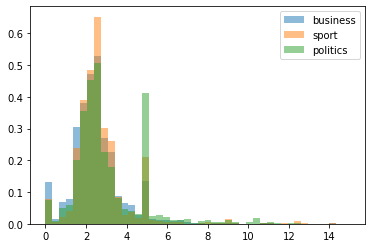

In [88]:
# Feature Evaluation | Evaluate Created Features 
from matplotlib import pyplot 
import numpy as np
%matplotlib inline 

bins = np.linspace(0,15,45)

pyplot.hist(data[data['label'] == 'business']['punct%'],bins, alpha=0.5, density=True, label='business')
pyplot.hist(data[data['label'] == 'sport']['punct%'],bins, alpha=0.5, density=True, label='sport')
pyplot.hist(data[data['label'] == 'politics']['punct%'],bins, alpha=0.5, density=True, label='politics')
pyplot.legend(loc='upper right')
pyplot.show()



In [141]:
val = data[data['label'] == 'politics']

print(sum(val['txt_len']) / len(val['txt_len']))

1621.34623338257


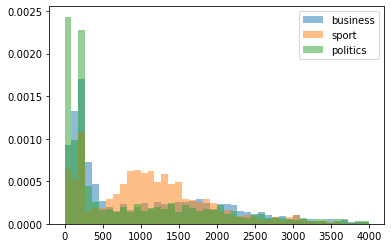

In [89]:
bins = np.linspace(0,4000,45)

pyplot.hist(data[data['label'] == 'business']['txt_len'],bins, alpha=0.5, density=True, label='business')
pyplot.hist(data[data['label'] == 'sport']['txt_len'],bins, alpha=0.5, density=True, label='sport')
pyplot.hist(data[data['label'] == 'politics']['txt_len'],bins, alpha=0.5, density=True, label='politics')
pyplot.legend(loc='upper right')
pyplot.show()

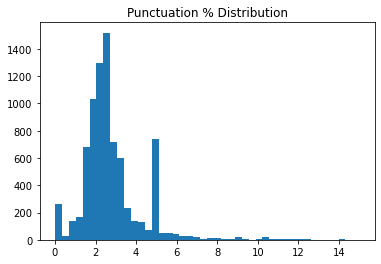

In [90]:
# Identify Features that qualify for transformation 
bins = np.linspace(0,15,45)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

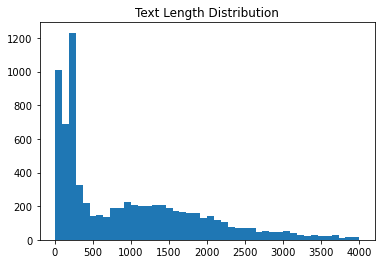

In [91]:
# Identify Features that qualify for transformation 
bins = np.linspace(0,4000,45)

pyplot.hist(data['txt_len'], bins)
pyplot.title("Text Length Distribution")
pyplot.show()

# The txt_len skews better towards zero and therefore qualifies to be a good feature for the model


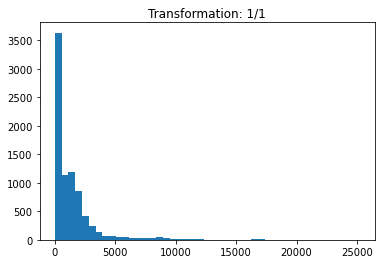

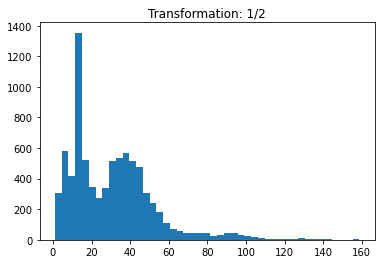

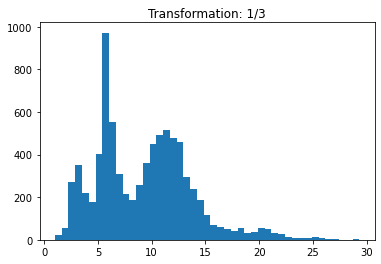

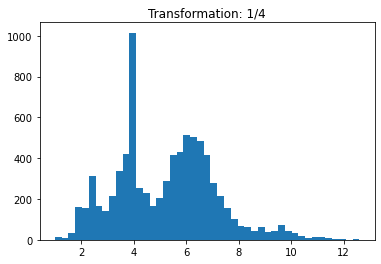

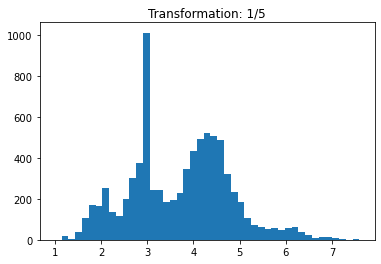

In [92]:
# Box-Cox Power Transformations , transform the txt_len feature 
# Transformation alters each data point int a certain column in a systematic way that makes it cleaner for the model to use
# For instance, that could mean squaring each value or taking the square root of each value / column. 

# Transformation Process 
# 1. Determine what range of exponents to test 
# 2. Apply each transformation to each value of your chosen feature
# 3. Use some criteria to determine which of the transformations yield the best distribution 

for i in [1,2,3,4,5]:
    pyplot.hist((data['txt_len'])**(1/i) , bins=45)
    pyplot.title('Transformation: 1/{}'.format(str(i)))
    pyplot.show()

In [23]:
# We use the K-Fold Cross- Validation technique to evaluate our models
# the full data set is divided into k-subsets and the holdout method is repeated k times. Each time, one of the k-subsets is
# used as the test set and the other k-1 subsets are put together to be used to train the model


#Ensemble Method
# The Technique creates multiple models and then combines them to produce better results than any of the single models 
# individually.

# Random Forest is an ensembe learning method tha constructs a collection of decision trees and then agggregates the
# predictions of each tree to determine the final prediction 

# Benefits of Ensemble Methods 
# Can be used for classification or regression
# Easily handles outliers, missing values, etc. 
# Accepts various types of inputs (continous, ordinalm etc.)
# Less likely to overfit
# Outputs feature importance


In [103]:
def clean_text(text):
    #text = clean_special_patterns(text)
    text = "".join([word.lower() for word in text if word not in string.punctuation])   
    numeric_removal = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text)
    tokens = re.split('\W+', numeric_removal)
    text = [wn.lemmatize(word) for word in tokens if word not in list_of_english_stopwords]
    return text

In [121]:
word_dist = nltk.FreqDist(data['text'])
print(word_dist)


#word_dist = nltk.FreqDist(words)

#rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

IndentationError: unexpected indent (<ipython-input-121-a00a9649a254>, line 8)

In [119]:
#try out Count Vectorizer 
from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer(analyzer=clean_text)

#train the vectorizer
X_counts = count_vect.fit_transform(data['text'])

print(X_counts.shape)
print(count_vect.get_feature_names())




(8173, 47705)
['', '0000hrs', '000km', '000mt', '001cf002', '002mbd', '003sec', '004secs', '018mgbomagbaja', '01point', '021billion', '022020', '032849secs', '032994secs', '045mbd', '059bn', '05km', '0700hrs', '0740hrs', '08037038325', '0px', '0they', '1', '10', '100', '1000', '100000aweek', '100000mt', '10000kilometre', '10000km', '10000litres', '10000m', '10000mw', '10000pounds', '1000am', '1000mw', '1000pm', '1000th', '100110m', '1003sec', '10071mw', '100b', '100bed', '100km', '100kwh', '100m', '100metre', '100metres', '100million', '100point', '100th', '100thminute', '100watt', '100yard', '100yearold', '101', '101088mwh', '1014bn', '1015pm', '101aiii', '101kg', '1024am', '1029mw', '102kg', '102nd', '1030gmt', '10338bcf', '10355million', '1036bcf', '103rd', '10408bcf', '104kg', '1050am', '10571mw', '105bn', '105kg', '105m', '105million', '105millioneuro', '105yearold', '106b', '106kg', '106km', '107486mmscfd', '107kg', '107m', '107million', '1080p', '10824mw', '10833sqkm', '108m', '

In [26]:
#Vectorizers Output Sparse matrices 
#x_counts_df =    pd.DataFrame(X_counts.toarray())
#x_counts_df.columns = count_vect.get_feature_names()
#x_counts_df

NameError: name 'X_counts' is not defined

In [76]:
#N-Gram Vectorization Process

def clean_text_ngram(text):
    """
    Modified on the text line as N Gram needs words together to check for the adjacent words while generating
    its N-Gram thingie
    """
    text = clean_special_patterns(text)
    text = "".join([word.lower() for word in text if word not in string.punctuation])   
    numeric_removal = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text)
    tokens = re.split('\W+', numeric_removal)
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in list_of_english_stopwords])
    return text


#business_data['cleaned_text'] = business_data['raw_text'].apply(lambda x: clean_text_ngram(x))
#business_data.head()




In [ ]:
## N_GRAM VECTORIZER
#(1,1) -> Search for unigrams 
#(1,2) -> Search for unigrams and bigrams 
#(1,3) -> Search unigrams, bigrams, and trigrams
#...

#ngram_vect = CountVectorizer(ngram_range=(1,2))
#X_ngram_counts = ngram_vect.fit_transform(business_data['cleaned_text'])
#X_counts_ngram_df = pd.DataFrame(X_ngram_counts.toarray())
#X_counts_ngram_df.columns = ngram_vect.get_feature_names()

#X_counts_ngram_df


In [148]:
#TF-IDF (Term Frequency Inverse Document Frequency) Vectorizer create a Document Term Matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['text'])

X_features = pd.concat([data['txt_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
#X_features.columns= tfidf_vect.get_feature_names()
X_features.head()




,txt_len,punct%,0,1,2,3,4,5,6,7,...,47695,47696,47697,47698,47699,47700,47701,47702,47703,47704
0,912,2.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2050,5.2,0.024177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,113,0.9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,154,3.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1962,2.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# Build Random Forest Model | Explore RandomForestClassifier through Cross-Validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score


rf = RandomForestClassifier(n_jobs=-1)

k_fold = KFold(n_splits=5) # Assigns each observation of our original data too certain subsets
cross_val_score(rf,X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)


#On the first interation, the model was trained and evaluated on a test set and it predicted 90% (0.90091743) of the sample
#In the second iteration, it was trained on a different training set and evaluated on a different test set and also predicted
# 91% [0.90825688] of the sample
# Third Iteration : 91% [0.90825688]
# Fourth Iteration : 91% [0.90758874]
# Fifth iteration : 92% [0.91676867]

PicklingError: Could not pickle the task to send it to the workers.

In [112]:
# Explore RandomForestClassifier through Holdout Set
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split 

# Split my features 20% test, 80% train 

x_train, x_text, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [113]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)

# fit our model
rf_model = rf.fit(x_train, y_train)

In [114]:
# Feature importances 
sorted(zip(rf_model.feature_importances_, x_train.columns), reverse = True)[0:15]

[(0.015631198162772014, 14214),
 (0.015416337016383348, 9364),
 (0.015359834084065471, 33999),
 (0.014425430986580261, 11922),
 (0.014322983621526494, 34316),
 (0.01233393115567948, 24098),
 (0.0119770870836974, 34864),
 (0.01177411865720081, 9407),
 (0.011185140721547844, 17047),
 (0.01051929794112386, 18486),
 (0.010516737374636194, 41433),
 (0.010176704757912077, 8664),
 (0.009635247887875682, 17731),
 (0.009513163380454156, 46989),
 (0.009454550555577274, 35821)]

In [115]:
y_pred =  rf_model.predict(x_text)

#'micro', 'macro', 'weighted'
precision, recall, fscore, support= score(y_test, y_pred, average='macro')

In [116]:
print('Precision: {} / Recall : {} / Accuracy: {}'.format(round(precision, 3),
                                                         round(recall, 3),
                                                         round((y_pred==y_test).sum()/len(y_pred),3)))

# Predicted test at 93%
# properly recognized 88% of test in the right label
# The multicall label were identified 90% of the time

Precision: 0.901 / Recall : 0.857 / Accuracy: 0.869


In [100]:
# Exploring GridSearch 

def train_RF(n_est,depth):
    rf =  RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(x_train,y_train)
    y_pred = rf_model.predict(x_text)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')
    print('EST: {} / Depth : {} ---- Precision: {} / Recall : {} / Accuracy: {}'.format(n_est, depth,
                                                                                         round(precision, 3),
                                                                                         round(recall, 3), 
                                                                                         round((y_pred==y_test).sum()/len(y_pred),3)
                                                                                        ))

In [101]:
for n_est in [10,150,300, 500]:
    for depth in [30,60,90,180,None]:
        train_RF(n_est, depth)

EST: 10 / Depth : 30 ---- Precision: 0.892 / Recall : 0.859 / Accuracy: 0.869
EST: 10 / Depth : 60 ---- Precision: 0.904 / Recall : 0.888 / Accuracy: 0.892
EST: 10 / Depth : 90 ---- Precision: 0.901 / Recall : 0.877 / Accuracy: 0.883
EST: 10 / Depth : 180 ---- Precision: 0.9 / Recall : 0.89 / Accuracy: 0.891
EST: 10 / Depth : None ---- Precision: 0.902 / Recall : 0.89 / Accuracy: 0.891
EST: 150 / Depth : 30 ---- Precision: 0.922 / Recall : 0.893 / Accuracy: 0.902
EST: 150 / Depth : 60 ---- Precision: 0.922 / Recall : 0.902 / Accuracy: 0.908
EST: 150 / Depth : 90 ---- Precision: 0.927 / Recall : 0.913 / Accuracy: 0.916
EST: 150 / Depth : 180 ---- Precision: 0.929 / Recall : 0.917 / Accuracy: 0.919
EST: 150 / Depth : None ---- Precision: 0.924 / Recall : 0.913 / Accuracy: 0.914
EST: 300 / Depth : 30 ---- Precision: 0.915 / Recall : 0.887 / Accuracy: 0.897
EST: 300 / Depth : 60 ---- Precision: 0.923 / Recall : 0.902 / Accuracy: 0.909
EST: 300 / Depth : 90 ---- Precision: 0.927 / Recall : 

In [ ]:
# Evaluate the Random Forest model with GridSearchCrossValidation [GridSearchCV]
